In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential 
from tensorflow.keras.activations import linear,sigmoid,relu
from tensorflow.keras.losses import BinaryCrossentropy,SparseCategoricalCrossentropy
from public_tests import *
from autils import *

In [42]:
X,y=load_data()

In [43]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [44]:
print(X[0].shape)

(400,)


In [45]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [46]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


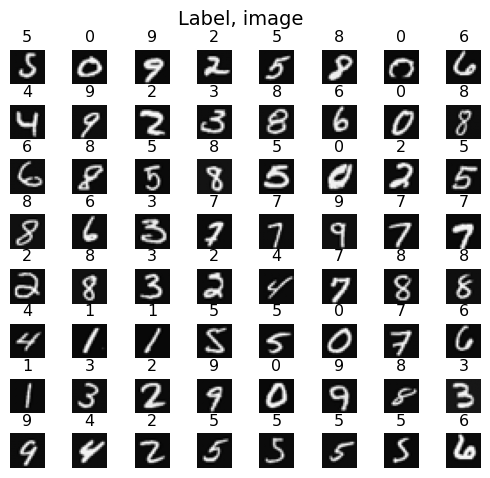

In [47]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [48]:
tf.random.set_seed(1234)
model=Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25,activation='relu',name='Layer1'),
    Dense(units=15,activation='relu',name='Layer2'),
    Dense(units=10,activation='linear',name='Layer3')
],name='my_model')

In [49]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer3 (Dense)                  │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
[Layer1,Layer2,Layer3]=model.layers

In [51]:
W1,b1=Layer1.get_weights()
W2,b2=Layer2.get_weights()
W3,b3=Layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")


W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [52]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
history=model.fit(X,y,epochs=40)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9075  
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.8109
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.4804
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.3663
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.3109
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.2752
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.2483
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.2262
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.2089
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.1939
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.1810
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.1702
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.1605
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1515
Epoch 15/40
157/157 ━━━━━━━━━

In [53]:
image_of_two=X[1015]
print(image_of_two.shape)
prediction=model.predict(image_of_two.reshape(1,400))
print(image_of_two.shape)
print(f"predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")



(400,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
(400,)
predicting a Two: 
[[-10.9879265   3.6875355   6.370956   -1.2945337 -11.659174  -13.206283
   -6.5278645  -0.7587603  -4.909208  -11.265764 ]]
 Largest Prediction index: 2


In [54]:
prediction_p=tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")


 predicting a Two. Probability vector: 
[[2.7033726e-08 6.3881963e-02 9.3491679e-01 4.3822092e-04 1.3816144e-08
  2.9409422e-09 2.3382249e-06 7.4881827e-04 1.1799403e-05 2.0475879e-08]]
Total of predictions: 1.000


In [58]:
yhat=np.argmax(prediction_p)
yhat

2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

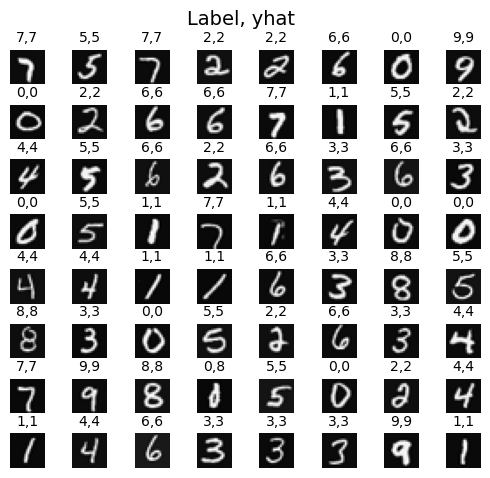

In [59]:

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [56]:
image=X[6]
prediction=model.predict(image.reshape(1,400))
print(prediction)
print(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[ 13.15994   -12.814241   -4.4085684  -4.051124  -20.219194   -3.6822577
  -19.729689  -21.036713    4.8945765  -1.7964852]]
0


In [57]:
print(y[1015])

[2]
